# Super-resolução de imagens com Deep Learning
## Curso de Fotografia Computacional

Referência: https://arxiv.org/pdf/2107.10833.pdf

### Upload das imagens

In [ ]:
from google.colab.files import upload
_ = upload()

Saving dinner.jpg to dinner.jpg


### Imports

In [ ]:
!git clone https://github.com/sberbank-ai/Real-ESRGAN realesrgan
!cd realesrgan && pip install -r requirements.txt
!python realesrgan/setup.py install

Cloning into 'realesrgan'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 96 (delta 6), reused 5 (delta 5), pack-reused 81
Receiving objects: 100% (96/96), 10.16 MiB | 17.28 MiB/s, done.
Resolving deltas: 100% (38/38), done.
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/c

In [ ]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import torch
from PIL import Image
from realesrgan.RealESRGAN import RealESRGAN

In [ ]:
def show_image(img, figsize=(30, 15)):
  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(1, 1, 1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img, cmap="gray")
  plt.show()

def show_images(img_list, figsize=None):
  n = len(img_list)
  if figsize == None:
    figsize = (5 * n, 8)
  fig, ax = plt.subplots(1, n, figsize=figsize)
  for i in range(n):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(img_list[i], cmap="gray")
  plt.show()

### Carregando imagens

In [ ]:
files = glob("*.jpeg") + glob("*.jpg") + glob("*.png") + glob("*.tiff")
files

['dinner.jpg']

In [ ]:
sr_scale = 4 # 4 times upsample

In [ ]:
path_to_image = files[0]
target = Image.open(path_to_image).convert('RGB')

width, height = target.size
input_image = target.resize((width // sr_scale, height // sr_scale))

# garantir tamanho divisível por sr_scale
dims = input_image.resize((input_image.size[0] * sr_scale, input_image.size[1] * sr_scale)).size
target = target.resize(dims)

In [ ]:
[i % sr_scale == 0 for i in target.size]

[True, True]

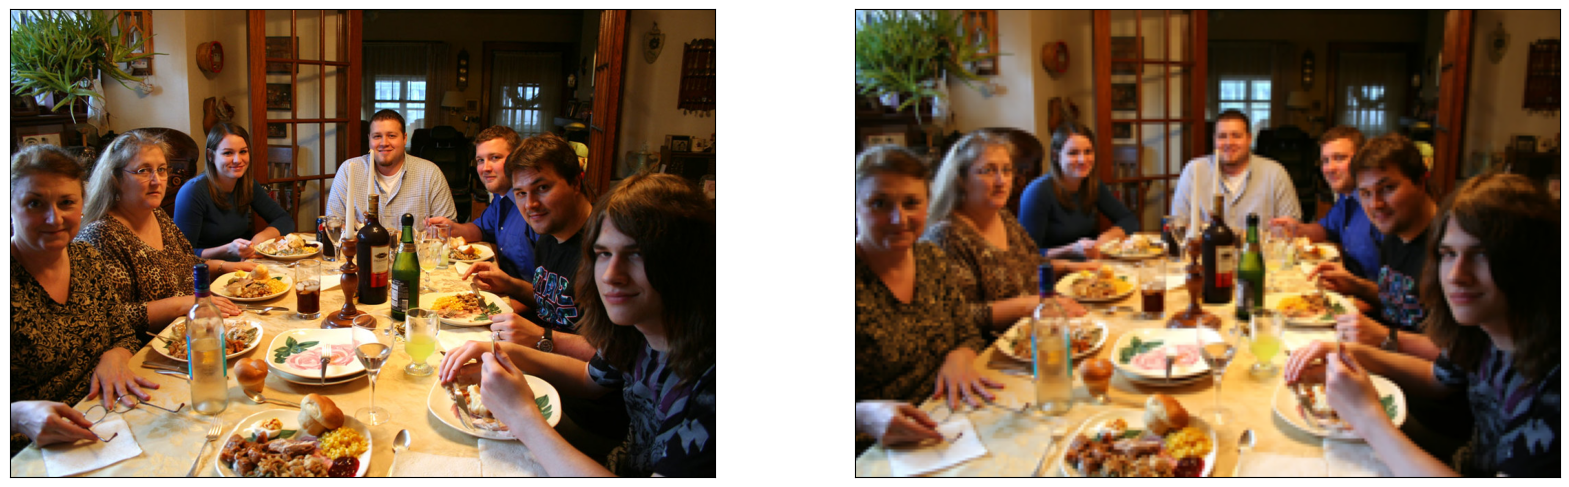

In [ ]:
show_images([target, input_image], (20, 15))

In [ ]:
target.size, input_image.size

((1024, 680), (256, 170))

### Dispositivo de inferência
cuda == GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Executando a super-resolução


Carregando o modelo e os pesos

In [ ]:
model = RealESRGAN(device, scale=sr_scale)
model.load_weights(f"weights/RealESRGAN_x{sr_scale}.pth")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:672: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


RealESRGAN_x4.pth:   0%|          | 0.00/67.0M [00:00<?, ?B/s]

Weights downloaded to: weights/RealESRGAN_x4.pth


In [ ]:
sr_image = model.predict(input_image)
sr_image.save("sr_image.jpg")

In [ ]:
sr_image.size == target.size

True

In [ ]:
input_image = np.array(input_image)
target = np.array(target)
sr_image = np.array(sr_image)

In [ ]:
show_images([input_image, target, sr_image], figsize=(30, 15))

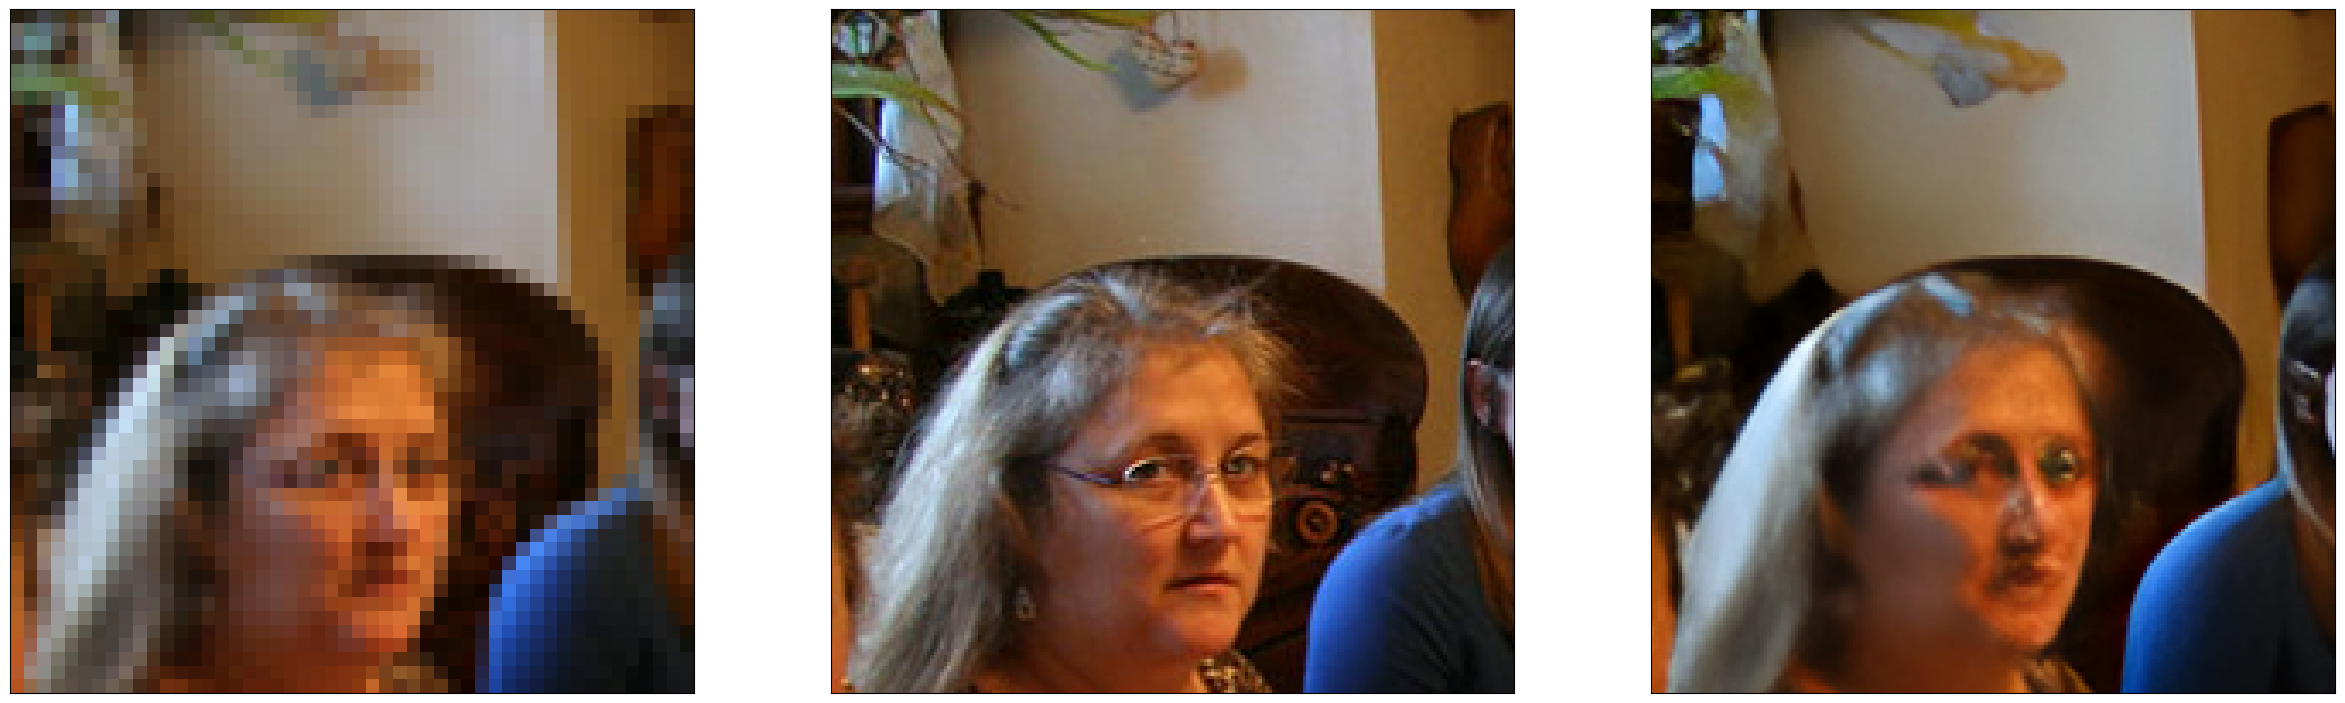

In [ ]:
show_images(
    [
        input_image[(100//sr_scale):(300//sr_scale), (100//sr_scale):(300//sr_scale)],
        target[100:300, 100:300],
        sr_image[100:300, 100:300]
    ],
    figsize=(30, 15))